# **Import all the needed library**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Sparse matrix operations
from scipy.sparse import hstack, csr_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

 # **Import the data from csv file**

In [ ]:
#Read csv file
book_data_encoded = pd.read_csv("book_data_encoded.csv")
book_data_encoded.info()
book_data_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   asin                                        129462 non-null  object 
 1   title                                       129462 non-null  object 
 2   author                                      129462 non-null  object 
 3   stars                                       129462 non-null  float64
 4   price                                       129462 non-null  float64
 5   isKindleUnlimited                           129462 non-null  bool   
 6   category_id                                 129462 non-null  int64  
 7   isBestSeller                                129462 non-null  bool   
 8   isEditorsPick                               129462 non-null  bool   
 9   isGoodReadsChoice                           129462 non-null  bool   
 

,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---

# **Balancing the data between bestseller and non bestseller books**
Before training model 2, we will balance the data between bestseller books and non bestseller books first.

## **I. Separate the original DataFrame into two new DataFrames:**
- book_data_bestseller: Contains only bestseller books
- book_data_non_bestseller: Contains only non bestseller books.

In [ ]:
#Separate bestseller and non bestseller books
book_data_bestseller = book_data_encoded[book_data_encoded['isBestSeller'] == True]
bestseller_shape = book_data_bestseller.shape
book_data_non_bestseller = book_data_encoded[book_data_encoded['isBestSeller'] == False]
non_bestseller_shape = book_data_non_bestseller.shape
print('book_data_bestseller dimensions: ', bestseller_shape)
print('book_data_non_bestseller dimensions: ', non_bestseller_shape)

book_data_bestseller dimensions:  (2141, 41)
book_data_non_bestseller dimensions:  (127321, 41)


## **II. Non bestseller books resampling:**

We will choose some non bestseller books as representative. To include a fair amount of books instead of randomizing the data, we will use k-mean clustering model to group the non bestseller books into different clusters and choose some from each cluster.

### **a. Prepare data for clustering**
To begin, we will drop the column that does not contains predictors. We want to keep only the predictors to find books with similar features and group them together.

In [ ]:
#Drop unnecessary columns
columns_to_drop = ['asin', 'title', 'author', 'isKindleUnlimited',	'category_id',
                   'isBestSeller',	'isEditorsPick',	'isGoodReadsChoice']
book_data_clustering = book_data_non_bestseller.drop(columns= columns_to_drop)
book_data_clustering.head()

,stars,price,top_author,category_name_Biographies & Memoirs,category_name_Business & Money,category_name_Children's eBooks,category_name_Comics,category_name_Computers & Technology,"category_name_Cookbooks, Food & Wine","category_name_Crafts, Hobbies & Home",...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
1,4.4,16.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.8,16.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.2,9.95,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.7,13.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4.6,13.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **b. Elbow Method:**

We will then use elbow method to find the point when Within Cluster Sum of Squares stops decreasing significantly. This value would give us the ideal number of clusters for our data.

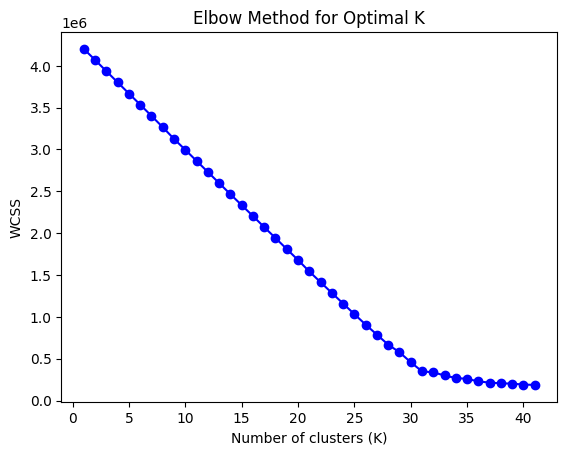

In [ ]:
#Elbow method
scaler = StandardScaler()
book_data_scaled = scaler.fit_transform(book_data_clustering)

wcss = []
K_range = range(1, 42)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(book_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

**1. Data Scaling**:
   - Data from the preprocessed `book_data_clustering` dataframe is scaled using `StandardScaler` to ensure features are normalized and ready for clustering.

**2. Elbow Method Implementation**:
   - The Within-Cluster Sum of Squares (WCSS) is computed for a range of cluster values (`K_range = range(1, 42)`).
   - A KMeans model is trained for each `k` in the range, and the resulting WCSS is stored for analysis.

**3. Visualization**:
   - The WCSS values are plotted against the number of clusters, producing a curve that indicates the optimal number of clusters.
   - The "elbow point" represents where the WCSS stops decreasing significantly, signaling the ideal `k`.

### **c. K-Means Clustering Implementation**
- From our Elbow Method, we found that the best number of clusters for non bestseller books is 31.
- To explain this number, we believe that most of the books are clustered by their genres (which also comes with 31 unique values).
- Now, we will use the k-means clustering model to group the books into 31 clusters.


In [ ]:
#kmeans clustering
n_clusters = 31
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(book_data_scaled)

KMeans(n_clusters=31)

### **d. Adding Cluster Labels and Previewing Data**
After grouping the books into 31 clusters, we will create a new columns `"cluster"` in book_data_clustering.

In [ ]:
#Add 'cluster' column
book_data_clustering['cluster'] = kmeans.labels_
book_data_clustering.head()

,stars,price,top_author,category_name_Biographies & Memoirs,category_name_Business & Money,category_name_Children's eBooks,category_name_Comics,category_name_Computers & Technology,"category_name_Cookbooks, Food & Wine","category_name_Crafts, Hobbies & Home",...,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel,cluster
1,4.4,16.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
2,4.8,16.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
3,4.2,9.95,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
4,4.7,13.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
5,4.6,13.99,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14


### **e. Resampling Non-Bestsellers Across Clusters**

From each cluster, we would select 4% of the books.


In [ ]:
#Resampling non bestseller books
sampled_non_bestseller = (book_data_clustering.groupby('cluster').apply(lambda group: group.sample(frac=0.04)))

sampled_non_bestseller.index = sampled_non_bestseller.index.droplevel()
sampled_non_bestseller = book_data_non_bestseller.loc[sampled_non_bestseller.index]

sampled_non_bestseller.info()
sampled_non_bestseller.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5093 entries, 127670 to 98715
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   asin                                        5093 non-null   object 
 1   title                                       5093 non-null   object 
 2   author                                      5093 non-null   object 
 3   stars                                       5093 non-null   float64
 4   price                                       5093 non-null   float64
 5   isKindleUnlimited                           5093 non-null   bool   
 6   category_id                                 5093 non-null   int64  
 7   isBestSeller                                5093 non-null   bool   
 8   isEditorsPick                               5093 non-null   bool   
 9   isGoodReadsChoice                           5093 non-null   bool   
 10  top_author 

<ipython-input-22-ced1e308a53d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_non_bestseller = (book_data_clustering.groupby('cluster').apply(lambda group: group.sample(frac=0.04)))


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
127670,B06Y5YZ5FR,Harry Potter et la Chambre des Secrets: Harry ...,J.K. Rowling,4.8,0.00,True,25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127177,B001VE5N4W,"Hunted: House of Night Series, Book 5",P. C. Cast,4.8,0.00,False,25,False,False,True,...,False,False,False,False,False,False,False,False,False,False
127338,B01MQV6XRV,Warriors: A Vision of Shadows #4: Darkest Night,Erin Hunter,4.8,9.99,False,25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127864,B0BB8BBC4Y,The Legend of Dave the Villager Books 6-10 Ill...,Dave Villager,4.8,0.00,True,25,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127932,B0931ZM83N,Dave the Villager 36: Unofficial Minecraft Boo...,Dave Villager,4.8,3.99,True,25,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **III. Bestseller books resampling**
We will resample bestseller books data so that they would have the same amount of data as non bestseller books.

In [ ]:
#Resample best seller books
number_non_bestseller = sampled_non_bestseller.shape[0]
sampled_bestseller = resample(book_data_bestseller, replace=True, n_samples=number_non_bestseller)

## **IV. Balancing Bestseller and Non-Bestseller Classes**

We will now combine the sampled_bestseller DataFrame and sampled_non_bestseller DataFrame to create the balanced DataFrame

In [ ]:
#Balancing the data
book_data_balanced = pd.concat([sampled_bestseller, sampled_non_bestseller], ignore_index=True)
print("Balanced dataset shape:", book_data_balanced.shape)
book_data_balanced.head()

Balanced dataset shape: (10186, 41)


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,...,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B0CFWMH8RB,Reframe Your Brain: The User Interface for Hap...,Scott Adams,4.8,9.99,False,27,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B0B9BCP7LP,The Peking Express: The Bandits Who Stole a Tr...,James M Zimmerman,4.5,3.99,False,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B0CBWJKK4W,Amish Harvest Time: Amish Romance (The Amish B...,Samantha Price,4.7,4.99,True,5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,B0B6GNP833,The Bones at Point No Point (A Thomas Austin C...,D.D. Black,4.4,4.99,True,21,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,B09MDRQB5P,Quantum Physics For Beginners: The Simple Guid...,Jeremy Wooster,4.3,9.99,True,11,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## **V. Save book_data_balanced into a csv file**
We will save book_data_balanced into a csv file for future use.

In [ ]:
book_data_balanced.to_csv('book_data_balanced.csv', index=False)

# **Model 2: Classification Tree - Max Depth of 4**

## **I. Data Preparation:**
- **Response and Predictors:**
   - Predictors:
   > `Title`\
   > `Author`\
   > `Genre`\
   > `Star rating`\
   > `Price`
   - Response: `isBestSeller`.

- **Train-Test Split**:
   - Dataset split: **80% training**, **20% testing**, ensuring robust evaluation.

- **TF-IDF Vectorization**:
   - Text data (`title`) is transformed into numeric features using the **TF-IDF** method.
   - Sparse matrices are created for numeric features for efficiency.

## **II. Model Training:**
- **Feature Combination**:
   - Features are combined into a single matrix for training and testing.

- **Decision Tree**:
   - A **DecisionTreeClassifier** is trained using predictors to give the response.

## **III. Visualization:**
- **Decision Tree Plot**:
   - Tree visualization is created with clear labels for feature names and class outcomes (False, True).
   - Enables interpretation of classification rules and feature importance.

This workflow ensures efficient data handling, feature engineering, and meaningful visualization for interpreting the classification model.

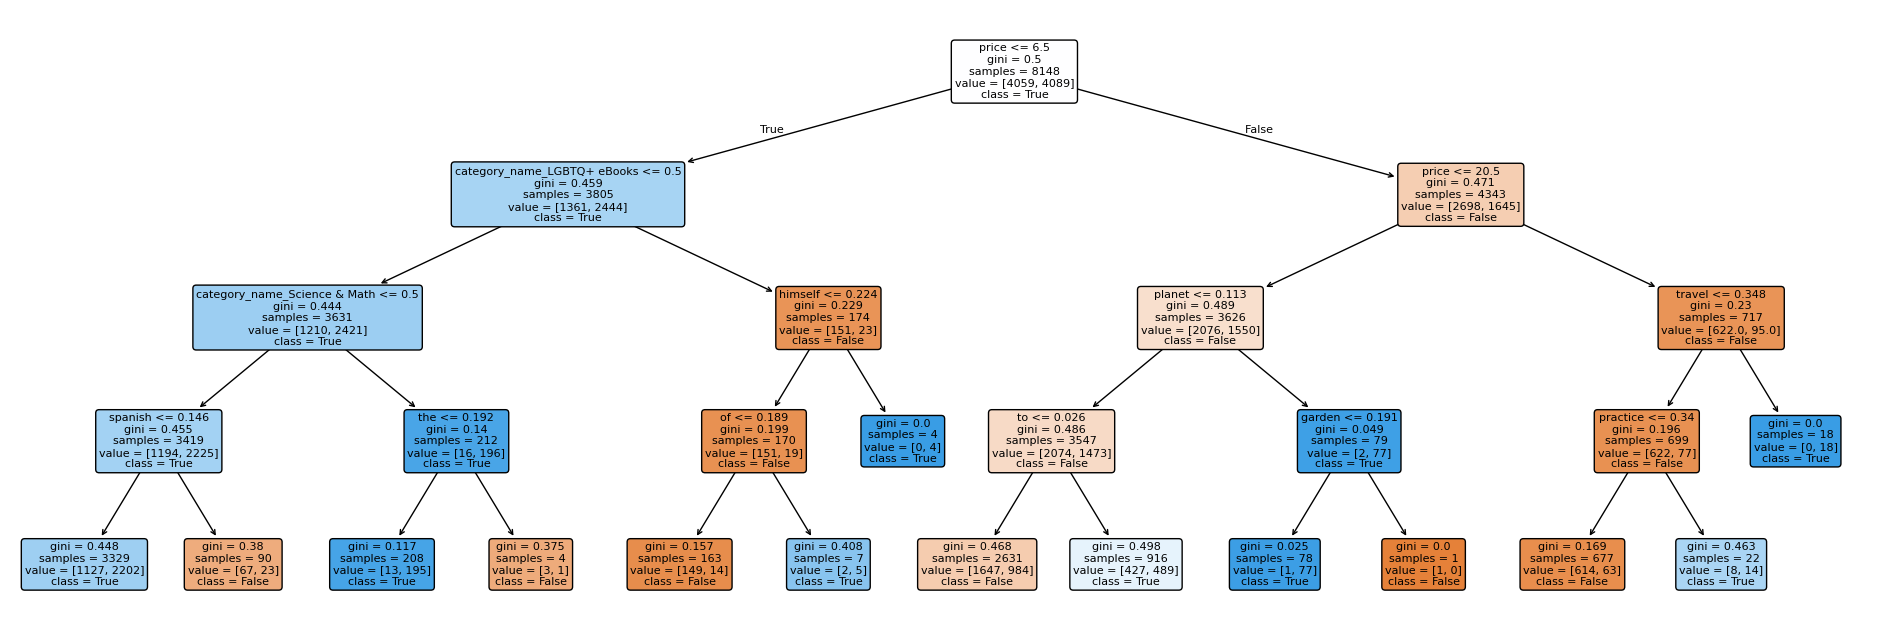

In [ ]:
# Extract response and predictor variables
X_text = book_data_balanced['title']
X_other = book_data_balanced.drop(columns=['asin', 'title', 'author', 'isKindleUnlimited', 'category_id',
                                           'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice'])
y = book_data_balanced['isBestSeller']

# Split the dataset into training and testing sets
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(X_text, X_other, y, test_size=0.2)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

X_other_train = X_other_train.astype(int)
X_other_test = X_other_test.astype(int)

# Convert numeric features to sparse matrices
X_other_train_sparse = csr_matrix(X_other_train.values)
X_other_test_sparse = csr_matrix(X_other_test.values)

# Combine text and numeric features
X_train_combined = hstack([X_text_train_tfidf, X_other_train_sparse])
X_test_combined = hstack([X_text_test_tfidf, X_other_test_sparse])

# Get combined feature names
text_feature_names = vectorizer.get_feature_names_out()
numeric_feature_names = X_other_train.columns.tolist()
combined_feature_names = list(text_feature_names) + numeric_feature_names

# Train a decision tree classifier
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train_combined, y_train)

# Visualize the decision tree
plt.figure(figsize=(24, 8))
plot_tree(dectree, filled=True, rounded=True, feature_names=combined_feature_names,
          class_names=["False", "True"], fontsize=8)
plt.show()

### **Overview:**
A decision tree was trained to classify books based on features such as price, text data (TF-IDF vectors), and numeric predictors. The tree splits data into two classes: **True** (bestseller) and **False** (non-bestseller), using feature thresholds and impurity metrics.

### **Key Highlights:**
1. **Root Node**:
   - Splits data on `price <= 6.5`, with a **Gini impurity of 0.5** and **8148 samples**.

2. **Second-Level Nodes**:
   - Splits involve features such as `category_name LGBTQ+ e books <= 0.5` and `price <= 20.5`.
   - Provides further refinement by isolating subsets with **low impurity values**.

3. **Leaf Nodes**:
   - Terminal nodes represent subsets with pure or almost pure classifications, offering clear predictions.


# **Checking accuracy**

After training the classification tree (max depth = 4) model, we will check the accuracy for training dataset and testing dataset

##  **I. Train Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate

Train Data
Accuracy  :	 0.6731713303878253

TPR Train :	 0.7346539496209342
TNR Train :	 0.6112342941611234

FPR Train :	 0.3887657058388766
FNR Train :	 0.2653460503790658


<Axes: >

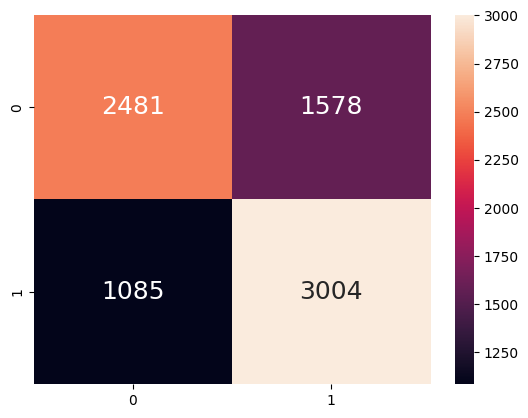

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_combined)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train_combined, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 2481 books were correctly classified as non-bestsellers.
- **True Positives (TP)**: 3004 books were correctly identified as bestsellers.
- **False Negatives (FN)**: 1085 bestsellers were misclassified as non-bestsellers.
- **False Positives (FP)**: 1578 non-bestsellers were misclassified as bestsellers.

### **Key Metrics:**
1. **Accuracy**:
   - The model achieved an accuracy of **67.32%**, reflecting moderate overall correctness in predictions.
2. **True Positive Rate (TPR)**:
   - **73.47%**, indicating the model 2 have improve in predicting bestseller books.
3. **True Negative Rate (TNR)**:
   - **61.12%**, which is lower than model 1 but is more reliable.
4. **False Positive Rate (FPR)**:
   - **38.88%**, highlighting acceptable misclassification of non-bestsellers.
5. **False Negative Rate (FNR)**:
   - **26.53%**, showing improvement in recognizing bestseller books.



## **II. Test Data Analysis**

We will use confusion matrix to check:
- Accuracy
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate


Test Data
Accuracy  :	 0.6481844946025516

TPR Test :	 0.7201195219123506
TNR Test :	 0.5783365570599613

FPR Test :	 0.42166344294003866
FNR Test :	 0.2798804780876494


<Axes: >

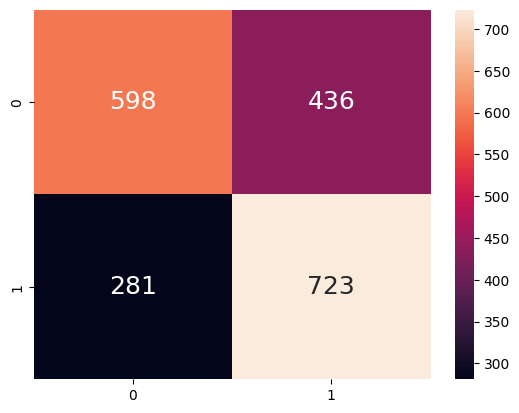

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test_combined)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test_combined, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Confusion Matrix:**
- **True Negatives (TN)**: 598 books were correctly classified as non-bestsellers.
- **True Positives (TP)**: 723 books were correctly identified as bestsellers.
- **False Negatives (FN)**: 281 bestsellers were misclassified as non-bestsellers.
- **False Positives (FP)**: 436 non-bestsellers were misclassified as bestsellers.

### **Key Metrics:**
1. **Accuracy**:
   - The model achieved an accuracy of **64.82%**, reflecting moderate overall correctness in predictions.
2. **True Positive Rate (TPR)**:
   - **72.01%**, indicating the model 2 have improve in predicting bestseller books.
3. **True Negative Rate (TNR)**:
   - **57.83%**, which is lower than model 1 but is more reliable.
4. **False Positive Rate (FPR)**:
   - **42.17%**, highlighting acceptable misclassification of non-bestsellers.
5. **False Negative Rate (FNR)**:
   - **27.99%**, showing improvement in recognizing bestseller books.


# **Conclusion:**

- The book_data_balanced DataFrame significantly increases True Positive Rate and decreases False Negative Rate.
- Although the Accuracy, True Negative Rate decrease and False Positive Rate increases, it is because the original data was dominated by non bestseller books, not because the model was better.